In [301]:
import pandas as pd
from collections import Counter
import matplotlib

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [302]:
df = pd.read_csv(r'C:\Users\Admin\Google Drive\3-Data_Science\Python\TrumpTweetsProject\trumptweets.csv')

In [303]:
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


In [304]:
#See raw word counts
Counter(" ".join(df["content"]).split())

Counter({'Be': 246,
         'sure': 269,
         'to': 17900,
         'tune': 44,
         'in': 10235,
         'and': 13660,
         'watch': 298,
         'Donald': 1207,
         'Trump': 3242,
         'on': 7141,
         'Late': 18,
         'Night': 43,
         'with': 4430,
         'David': 100,
         'Letterman': 43,
         'as': 1987,
         'he': 2179,
         'presents': 11,
         'the': 26851,
         'Top': 36,
         'Ten': 5,
         'List': 3,
         'tonight!': 68,
         'will': 5300,
         'be': 6064,
         'appearing': 13,
         'The': 4169,
         'View': 19,
         'tomorrow': 250,
         'morning': 188,
         'discuss': 53,
         'Celebrity': 219,
         'Apprentice': 278,
         'his': 1804,
         'new': 971,
         'book': 251,
         'Think': 250,
         'Like': 188,
         'A': 1101,
         'Champion!': 4,
         'reads': 5,
         'Financial': 14,
         'Tips': 2,
         'Show': 61,
  

In [305]:
#Count distinct words
word_df = pd.Series(' '.join(df['content']).lower().split()).value_counts()[:75]

#Convert the series into a dataframe to filter things
word_df = word_df.to_frame(name = 'count').reset_index()

#Cleaning titles
word_df.rename(columns={'index':'word'}, inplace=True)

#word_df.head(20)

In [306]:
#Manual filtering, depricated
#word_df = word_df[~word_df.word.isin(['@','the','to','and','a','of','is','in','"','for','i','on','you','#'])]
#word_df.head(20)

#Load stop words
stop_words = stopwords.words('english')
stop_words.extend(['@','"','#','&','…','-','.'])

#Show stop words
#stop_words[:100]

word_df = word_df[~word_df.word.isin(stop_words)]
word_df.head(50)

,word,count
11,realdonaldtrump,7936
17,great,5321
27,trump,3611
38,thank,2736
48,people,1946
52,would,1872
54,new,1785
55,get,1779
57,president,1686
59,like,1592


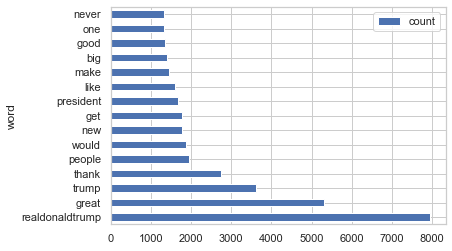

In [307]:
%matplotlib inline
word_df.plot(x='word', y='count',kind='barh')